Based on: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # suppress scientific float notation

## Generating Sample Data

(150L, 2L)


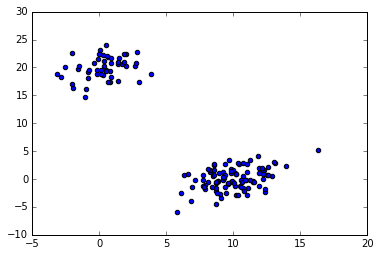

In [4]:
# generate two clusters: a with 100 points, b with 50
np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print X.shape  # 150 samples 
plt.scatter(X[:,0], X[:,1])
plt.show()
          

In [5]:
# generate the linkage matrix
Z = linkage(X, 'ward')

it never hurts to play around with some other common linkage methods like 'single', 'complete', 'average', ... and the different distance metrics like 'euclidean' (default), 'cityblock' aka Manhattan, 'hamming', 'cosine'... if you have the feeling that your data should not just be clustered to minimize the overall intra cluster variance in euclidean space. For example, you should have such a weird feeling with long (binary) feature vectors (e.g., word-vectors in text clustering).

In [7]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(Z, pdist(X))
c

0.98001483875742679

In [8]:
Z[0]

array([ 52.     ,  53.     ,   0.04151,   2.     ])

## Plotting Dendrogram

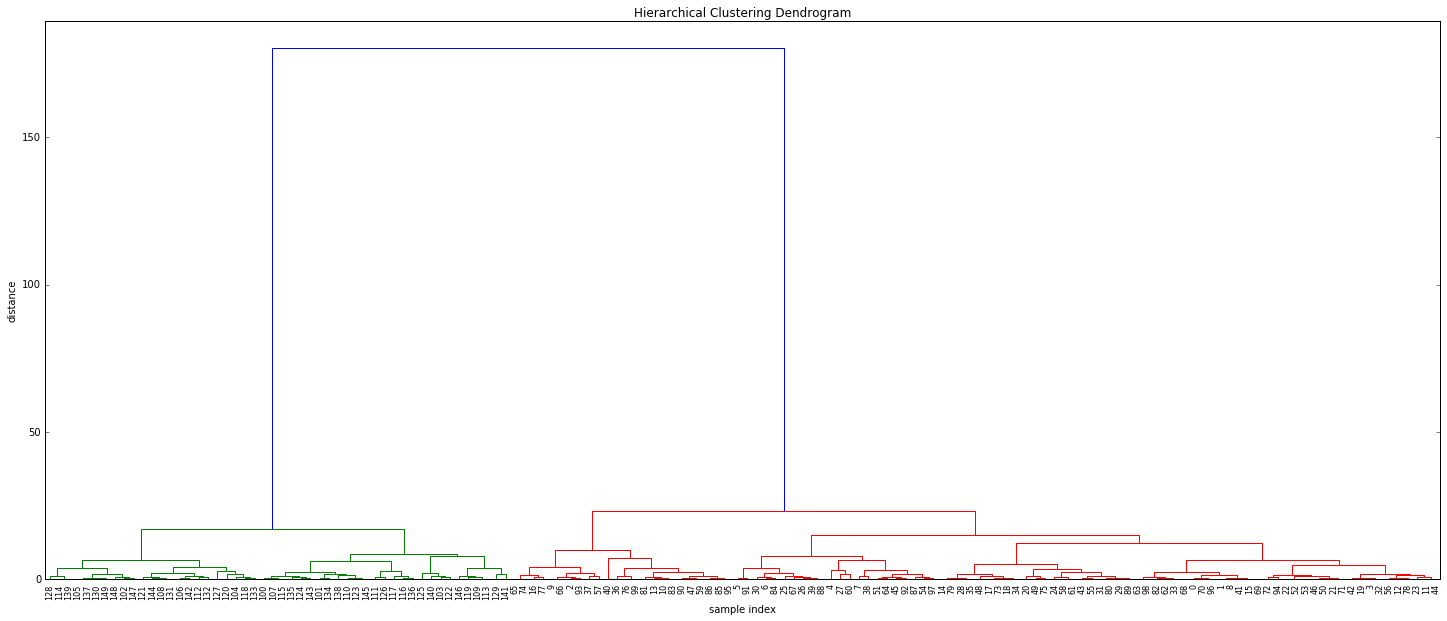

In [9]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

## Dendrogram Truncation

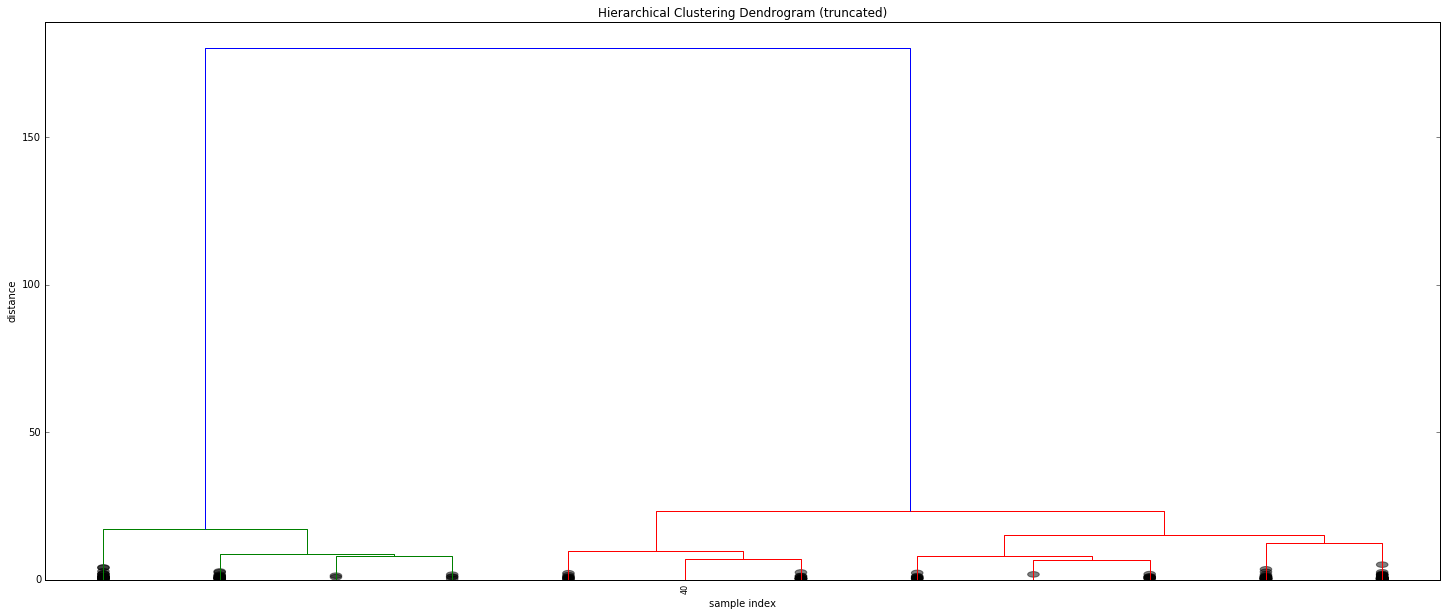

In [10]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, truncate_mode='lastp', p=12,
           show_leaf_counts=False, leaf_rotation=90.,
           leaf_font_size=8., show_contracted=True)
plt.show()